# EDA BASELINE

This notebook will be a baseline for EDA for my next competitions with tabular data. \
I will also make similar baseline for Text and Image data.

## IMPORTS

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport
import seaborn as sns

## CONFIG

In [2]:
config = {
    "TRAIN_PATH" : "D:/Documents/GitHub/ml-pipeline/data/TPS-DEC2021/train.csv",
    "TEST_PATH": "D:/Documents/GitHub/ml-pipeline/data/TPS-DEC2021/test.csv",
    "TARGET_VAR" : "Cover_Type"
}


## LOADING DATA

In [3]:
df_train = pd.read_csv(config["TRAIN_PATH"])
df_test = pd.read_csv(config["TEST_PATH"])

### TRAIN AND TEST SET OVERVIEW

Check dataset size, test set size, number of null values etc...

In [4]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2


In [21]:
df_train = df_train.drop(["Soil_Type15"], axis=1)
df_train.columns[1:54]


KeyError: "['Soil_Type15'] not found in axis"

In [5]:
df_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,4000000,2763,78,20,377,88,3104,218,213,195,...,0,0,0,0,0,0,0,0,0,0
1,4000001,2826,153,11,264,39,295,219,238,148,...,0,0,0,0,0,0,0,0,0,0
2,4000002,2948,57,19,56,44,852,202,217,163,...,0,0,1,0,0,0,0,0,0,0
3,4000003,2926,119,6,158,134,2136,234,240,142,...,0,0,0,0,0,0,0,0,0,0
4,4000004,2690,10,4,38,108,3589,213,221,229,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 56 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Id                                  int64
 1   Elevation                           int64
 2   Aspect                              int64
 3   Slope                               int64
 4   Horizontal_Distance_To_Hydrology    int64
 5   Vertical_Distance_To_Hydrology      int64
 6   Horizontal_Distance_To_Roadways     int64
 7   Hillshade_9am                       int64
 8   Hillshade_Noon                      int64
 9   Hillshade_3pm                       int64
 10  Horizontal_Distance_To_Fire_Points  int64
 11  Wilderness_Area1                    int64
 12  Wilderness_Area2                    int64
 13  Wilderness_Area3                    int64
 14  Wilderness_Area4                    int64
 15  Soil_Type1                          int64
 16  Soil_Type2                          

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 55 columns):
 #   Column                              Non-Null Count    Dtype
---  ------                              --------------    -----
 0   Id                                  1000000 non-null  int64
 1   Elevation                           1000000 non-null  int64
 2   Aspect                              1000000 non-null  int64
 3   Slope                               1000000 non-null  int64
 4   Horizontal_Distance_To_Hydrology    1000000 non-null  int64
 5   Vertical_Distance_To_Hydrology      1000000 non-null  int64
 6   Horizontal_Distance_To_Roadways     1000000 non-null  int64
 7   Hillshade_9am                       1000000 non-null  int64
 8   Hillshade_Noon                      1000000 non-null  int64
 9   Hillshade_3pm                       1000000 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  1000000 non-null  int64
 11  Wilderness_Area1                    10

Describe give you an overview of your continuous variables, check the different distributions, do they differ in the test set ?

In [8]:
df_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,...,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,2.000000e+06,2.980192e+03,1.515857e+02,1.509754e+01,2.713154e+02,5.166262e+01,1.766642e+03,2.118375e+02,2.210614e+02,1.408109e+02,...,3.746200e-02,3.782075e-02,1.199500e-02,1.605350e-02,1.071275e-02,1.220750e-02,4.075150e-02,3.923925e-02,3.161850e-02,1.771335e+00
std,1.154701e+06,2.890482e+02,1.099611e+02,8.546731e+00,2.265497e+02,6.821597e+01,1.315610e+03,3.075996e+01,2.223134e+01,4.369864e+01,...,1.898910e-01,1.907625e-01,1.088629e-01,1.256813e-01,1.029465e-01,1.098111e-01,1.977140e-01,1.941637e-01,1.749822e-01,8.938060e-01
min,0.000000e+00,1.773000e+03,-3.300000e+01,-3.000000e+00,-9.200000e+01,-3.170000e+02,-2.870000e+02,-4.000000e+00,4.900000e+01,-5.300000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,9.999998e+05,2.760000e+03,6.000000e+01,9.000000e+00,1.100000e+02,4.000000e+00,8.220000e+02,1.980000e+02,2.100000e+02,1.150000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.000000e+06,2.966000e+03,1.230000e+02,1.400000e+01,2.130000e+02,3.100000e+01,1.436000e+03,2.180000e+02,2.240000e+02,1.420000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,2.999999e+06,3.217000e+03,2.470000e+02,2.000000e+01,3.610000e+02,7.800000e+01,2.365000e+03,2.330000e+02,2.370000e+02,1.690000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
max,3.999999e+06,4.383000e+03,4.070000e+02,6.400000e+01,1.602000e+03,6.470000e+02,7.666000e+03,3.010000e+02,2.790000e+02,2.720000e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00


In [9]:
df_test.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,4.500000e+06,2969.602410,152.231636,14.923460,264.368149,51.480362,1713.507869,211.659709,221.476154,139.861454,...,0.029638,0.043415,0.040606,0.012155,0.015766,0.010695,0.012063,0.043393,0.039841,0.032778
std,2.886753e+05,342.676046,111.629725,8.457005,227.971753,68.520188,1374.922218,31.280435,21.951950,45.398002,...,0.169587,0.203790,0.197376,0.109578,0.124569,0.102862,0.109167,0.203740,0.195586,0.178055
min,4.000000e+06,1782.000000,-33.000000,-3.000000,-136.000000,-329.000000,-264.000000,1.000000,53.000000,-51.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.250000e+06,2725.000000,59.000000,9.000000,102.000000,3.000000,751.000000,197.000000,210.000000,114.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+06,2968.000000,124.000000,14.000000,206.000000,31.000000,1320.000000,218.000000,224.000000,142.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.749999e+06,3245.000000,251.000000,20.000000,356.000000,78.000000,2261.000000,234.000000,237.000000,169.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.999999e+06,4359.000000,400.000000,63.000000,1583.000000,634.000000,7653.000000,296.000000,276.000000,270.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### TARGET VARIABLE

Let's take a look at the target variable

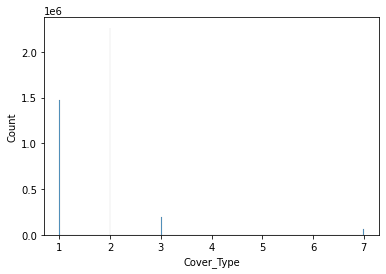

In [10]:
ax = sns.histplot(x=config["TARGET_VAR"], data=df_train)

### MISSING VALUES

In [11]:
def missing_zero_values_table(df): #Function to access missing and zero values in your dataset
        zero_val = (df == 0.00).astype(int).sum(axis=0) #Number of zeros in the dataset
        mis_val = df.isnull().sum() #Number of missing values in the dataset
        mis_val_percent = 100 * df.isnull().sum() / len(df) #percent missing values
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'}) #Create missing value table
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [12]:
missing_zero_values_table(df_train)

Your selected dataframe has 56 columns and 4000000 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [13]:
missing_zero_values_table(df_test)

Your selected dataframe has 55 columns and 1000000 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


### PANDAS PROFILING

We use pandas profiling to rapidly get many useful information about our dataset and it's features.

In [14]:
profile_train = ProfileReport(df_train, title='Pandas Train Profiling Report', html={'style':{'full_width':True}}, minimal=True)

In [15]:
profile_train

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


In [16]:
profile_test = ProfileReport(df_test, title='Pandas Train Profiling Report', html={'style':{'full_width':True}}, minimal=True)

In [17]:
profile_test

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]
